<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Basic_Classification_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Classification**

## Impoet Package

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Load Data

#### With Own Dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")
PATH = "/content/drive/My Drive/california_housing_train.csv"

read_csv = pd.read_csv(PATH)
housing = pd.DataFrame(read_csv)
housing

Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [3]:
housing['big_house'] = housing['total_rooms'] > 1000
housing # Updated dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,True
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,True
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,False
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,True
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,True
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,True
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,True
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,True
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,True


In [4]:
housing['big_house'] = housing['big_house'].astype(int) # Convert boolean values to integers(0, 1)
housing # Updated dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,1
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,1
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,0
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,1
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,1
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,1
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,1
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,1
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,1


In [5]:
housing_np = housing.to_numpy()

In [6]:
# Organise data
label_names = ['good_investment', 'bad_investment'] # Pseudo_targets, 0:good_investment, 1:bad_investment
labels = np.array(housing['big_house'])
 # In reality, it takes human intelligent to label the data, that is, to augment the data with a semantic message representing a human  concept (ontological)
feature_names = housing.loc[0]
features = housing_np[:, :-1]

In [7]:
housing.shape

(17000, 10)

In [8]:
features.shape

(17000, 9)

In [9]:
labels = labels.reshape(-1, 1)
labels.shape

(17000, 1)

In [10]:
# Split data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

## Setup and Train Classifier Model


### Naive Bayes Classifier

Pros:

1.   is stable
2.   works well with small dataset
3.   can resolve multi-class prediction problems

Cons:

1.   is weak with complex dataset (high dimensionality, highly relevant variables)
2.   requires priori probability
3.   is sensitive to the representation of the input data

In [11]:
# Initialise Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
print(preds)
print(int(len(preds)))
print(type(preds))

[1 1 1 ... 1 1 1]
5610
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Visualise Predictions

Matplotlib (static)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

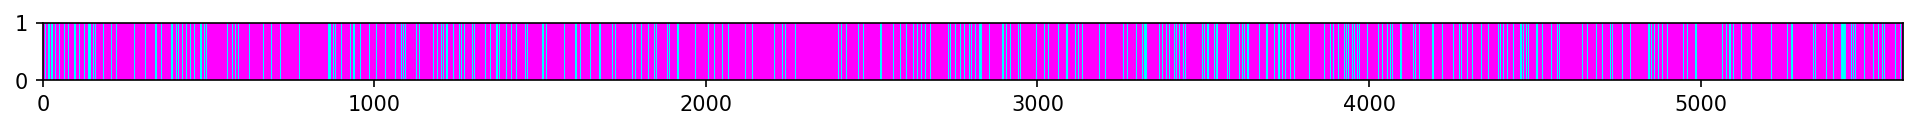

In [12]:
# Visualise predictions
plt.figure(figsize=(16, 0.5), dpi=150)

pos_x = []
for i in range(0, 5610):
  pos_x.append(i)

"""
pox_x = np.linspace(0, 5610, num=5610)
"""
print(pos_x)

pos_y = [0]*5610
print(pos_y)

plt.scatter(pos_x, pos_y, marker="|", c=preds.reshape(1, -1))
plt.pcolormesh(preds.reshape(1, -1), cmap='cool')
plt.axis('on')
plt.show()

Plotly (interactive)

In [13]:
import plotly.express as px

In [14]:
symbols = ['square', 'line-ns']
SYMBOLS = [0]*5610

fig = px.scatter(pos_y, color=preds, title="CA Housing: Good Investment?", symbol=SYMBOLS, symbol_sequence=symbols, opacity=0.5)
fig.update_traces(mode="markers")

fig.show()

Bokeh (interactive)

In [15]:
from bokeh.plotting import figure
from bokeh.io import output_file, output_notebook, show
from bokeh.models import LogColorMapper
output_notebook() # Function that renders the figure in a notebook; necessary for Bokeh rendering in Colab

In [21]:
df = pd.DataFrame({'X':pos_x, 'Y':pos_y})

TOOLS="hover,crosshair,pan,wheel_zoom,undo,redo,reset,tap,save,box_select,lasso_select"
# color_mapper = LogColorMapper(low=1, high=5610, palette='Viridis256')

fig = figure(title="CA Housing: Good Investment?", width=1200, height=200, tools=TOOLS, toolbar_location="below")
fig.square('X', 'Y', size=5, source=df, color='orange', alpha=0.7)

show(fig)

#### Check Accuracy

In [18]:
# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9322638146167558


## Test Trained Model: Makeing Predictions

In [19]:
check = 112 #@param{type:"slider", min:0, max:187, step:1}
preds[check]

if preds[check] == 1:
  comment = "A bargain indeed. Go for it."
  print(comment) # Benign, good
else:
  comment = "You deserve a better house."
  print(comment) # Malignant, bad

A bargain indeed. Go for it.


In [20]:
print("Data ID: {ID} \n>>> {COMMENT}\n".format(ID = check, COMMENT = comment))
print(housing.loc[check]) # To access the selected row

Data ID: 112 
>>> A bargain indeed. Go for it.

longitude              -115.7300
latitude                 32.8000
housing_median_age       44.0000
total_rooms             472.0000
total_bedrooms           81.0000
population              206.0000
households               57.0000
median_income             2.2083
median_house_value    93800.0000
big_house                 0.0000
Name: 112, dtype: float64
